In [1]:
import randomwalk as rw
import numpy as np
import matplotlib.pyplot as plt

# CW10 : Monte Carlo Techniques

The word "Monte Carlo" is a fancy term for what essentially means "using random numbers." Since computers are good at generating (pseudo)random numbers quickly, it can be advantageous to use this randomness for simulations. In this notebook, you will explore a few interesting examples of this idea.

## Estimating $\pi$
As a simple example, consider the following technique for computing the number $\pi$:
  - Area of a unit circle : $\pi$
  - Area of a the minimum box that fits the unit circle, with side length 2 : $4$
  - Fraction of area of the box taken up by the unit circle: $\pi/4$
  - Therefore: If one finds the fraction of random points that uniformly cover such a box that fall inside the unit circle, then multiplying this fraction by 4 will yield $\pi$.

Let's test this idea:

In [2]:
def estimate_pi(N=100000):
    # Generate N random x and y coordinates within the box with sides from [-2,2]
    xs = np.random.uniform(-1,1,N)
    ys = np.random.uniform(-1,1,N)
    # Count how many points lie within the unit circle
    circle = np.where(xs**2 + ys**2 < 1, 1, 0).sum()
    # Compute pi
    return 4 * circle / N

In [3]:
for N in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    print("N=",N, " : pi=", estimate_pi(N))

N= 10  : pi= 3.2
N= 100  : pi= 3.52
N= 1000  : pi= 3.168
N= 10000  : pi= 3.1716
N= 100000  : pi= 3.14228
N= 1000000  : pi= 3.141596


N= 10000000  : pi= 3.1419996


Not bad for such a simple idea!

## Integrating a Function

Consider the following definition for integrating a function $f(x)$ between $x\in[a,b]$:

In [4]:
def estimate_integral(f,a,b,N=100000):
    xs = np.random.uniform(a,b,N)
    return f(xs).sum() * (b-a)/N

What does this do? It generates $N$ randomly chosen points $x_i$ in the range $[a,b]$, then finds the average function value of all those points $\bar{f} = \sum_{i=1}^N f(x_i)/N$, then multiplies this average value by the interval length to find the area: $A = \bar{f}*(b-a)$. This method relies upon the theorem in calculus that the integral is equal to the average value of the function over a domain times the domain itself (essentially approximating the whole integral as one big rectangle). Let's see how well it works in practice.

Recall that $\int_0^{2\pi}\sin(x)dx = 0$. Let's try to compute that using Monte Carlo methods:

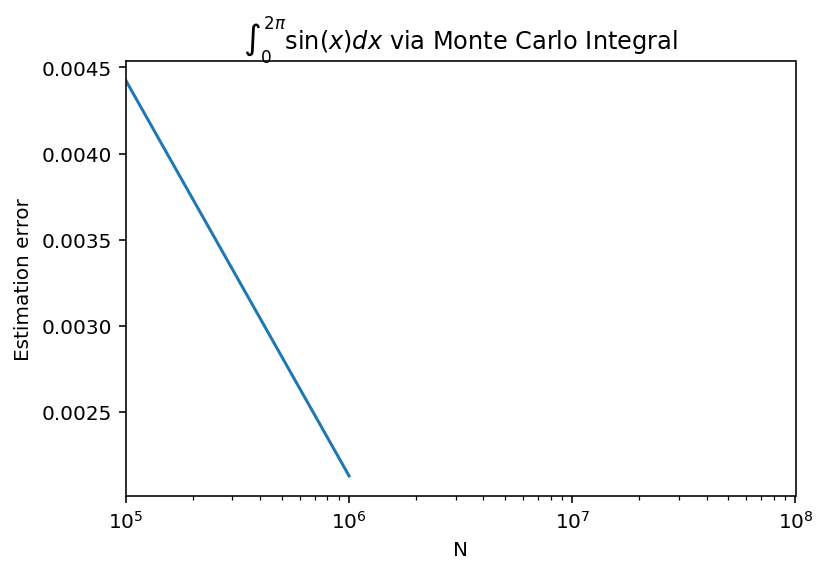

In [5]:
Ns = [10**i for i in range(5,7)]
Is = [estimate_integral(np.sin, 0, 2*np.pi, n) for n in Ns]
plt.semilogx(Ns,Is)
plt.title(r"$\int_0^{2\pi}\sin(x)dx$ via Monte Carlo Integral")
plt.xlabel("N")
plt.ylabel("Estimation error")
plt.xlim(10**5,10**8)
plt.show()

It does in fact converge eventually. Though this method is vastly less efficient than the trapezoid rule we have been using deterministically in 1D, it turns out that for higher dimensional integrals (like 10D) this stochastic technique can substantially outperform similar deterministic strategies.

## Random Walks

Where Monte Carlo methods really shine is in approximating behavior that is common in thermodynamics. For example, the air molecules in a room collide with each other constantly, effective jostling each other into random bits of short motion between collisions. Similarly, the molecules in a solid like a table vibrate and randomly exchange packets of energy as they essentially bump into each other - these packets of energy flow through the solid in the form of heat.

If we don't care much about the details of the motion, but want to capture the overall effects of the random jostling, we can simulate random walks of particles.

As a simple example, the following code places 100 particles at the origin of a 2D plane, then has them randomly walk around by taking integer steps in one of the four cardinal directions (E, W, N, S). The resulting animation shows their motion over time.

In [6]:
g = rw.walk_gen(walkers=100)

In [7]:
rw.plot_anim(g, xlim=(-50,50), ylim=(-50,50), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGlNG1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAWxZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4HShe6DhKq9DAABvIzcIk3f+ABLO++E67
pBhendidMhig5WmV6h73lqDj7Mh1OsrP9f35GBGKX23n8bzqT7oTWwNaVDGHQZS1Tk42Zt8BMtTD
twpUXrXmNVJNC2SyLhfqlPF65cdQsGzFpMNaBJESVb8QxBvWgQUMZbvilb+VYoQUbuQlR0ET/4rY
TY9eXMjCwRyIVgg6Sj6hr7uNdBumu2p7hDRQAEnUEDh87papwAmwgxaOFP1Hx1s/P4JY1Mn2//A0
soxfSsfTj9lXwG4TxtIKw8Dfd0WKLHQUDzDpLJIBgNnDim7CXJ57bCMV0vhmAnRD7r5PpQp+PbhK
2w67nflvWH6oVE8n6ghcpm9FjRt8pG8iYECzH5vrFEXWLOJ1XsaBxwJZNrxZr4nyXBHl+1Z2PqW+
8pyb9xHsXeqKkS0in8HcWlTDSNvshwhe4zMM7OxcGBOreIoCVh2ub5VAHm5a/itn0WwqFltuBv1D
oVhXq2YId5GLTKNMHwEnPB4vG8LAdOLrMQLOxNmJBGg85LaHhc2FQ4Evx+wl4nIReq/vXKMktsMF
zTlfy+INpMXHzWgGKUxJ+DUX7fcOMd3hI5tuRM/z9n6JbMsU6TDUJWxQucpRB+TFjTrYYeuKAjNF
yocnhrJFL6k055/gUmgu/pGtOed/TtVNtyrMr3rZjNkVHgj2yM3We4vbfxJNct0LV7lhTiG6mHd7
V/LJCFy4Ga4OBlbFOlAoSpdI6k+M5lhV3ZvwCkU+wp1SzOKJ6W5qwvG6zwOPZ0CbixuCTyOXOcHe
PI7nVagx/6hPYOv2/BuVFX+aHHVdbvqlNVjYzSyx0V5uExF4uXnKfsPNqSeL875FvjcirZvBEcAA
AlgqDJHp0uD0XKiWrqMk7DJ/9C13zSLsxZT3Phlx3sJoEvd2UxRKVjmGH5yg3tBHULrk4Mz2dr5N
lp0PCHRUclbeECwcjrl+DZoXv3/X6Oceuf374PgPjW+hycA3Xy0vrW8+sBHxMvY4q/lP3Q8QsjSv
8VDRxjXCDBpdG/Fzpe8UXnhDBtK5fmvEaE9wuhpPPBCQ8lj+q+1ZGMy4ea3eC6KMhEGlSk26WYfp
1SUzc82GQ3p2xGbKjjsmdDgCI8UY+sYYH/8PIfUxTY/JS8ChGsUBr6IMadUpyOA8yAw++MrQKljk
8Cq+qJDNuHzhfk+MWG4zOi8XG9TQObuxWtFI9Rqkjlfqz998rTnM7Fxqz9PSxTsz4Yt8qLPVid8C
o4pKzqqHjytqC+XfOWwKkce6WbJ+tK+Eb5MqgznrOjI/vPXVLdtnWIuSNHl5rJ5oHNMjD7nTD7hB
W9Ots5WUUyznetEj4PXUMXAt4wZTdk2sM8RB2ZfSoHq3bpOTaR6ZGyaGWNI5T/MOhydj7KBXU0rz
jPFSmGVZLEujk0HKlOtC/+gJpJJqwEKqmp8KFiGLmBAB4X6A1ay9b1MaXdIgj0gdowZ7Cb9HehaD
2TDhVEgwDUSDSMLMky85rS77HXDE+ZFxqnL2+x/vNG8zgCnSnjZvRD8gycwKbd/tScjdKluSXQ7u
8VAdoMwmw3FDHJ9fIA03imw7brNKvuDw9ntR/bgUA8KU0tQrfQOzYaNi6jGmJa1oTdtIXkmJREnN
znhHkJg+MsL8s//kEQPE0Lv9elF/75GfNpsyY0JRcNpF5amqVcvn6KRSY5jSunvAaPw5yB1wT3Ni
6M09JLrtcGyWT2q+HC+hg9BP64X1HeDDPYznlP26yFWgQOXMBBYhjrx1Cp801gZKUBWWX98XtZFb
Bdcq0jwuHPIhF6mKV96HkRAJp74oKbc+JTzC3cWjhlAo7pSv8E1kWgFQjZfqDjYmHny/30uLTvJa
FtLOV3UajV/ijFjPeVRvfBoKrIA2qv0GoCbzcUEAAAE8QZokbEM//p4QZ2x3OmV6XqrCBaATDKat
8wpK/Ptd/KUnqXPtildxx3TROBlPaa2s/ZqYUjKD5pF5VE73h4L+ydP1ZiGqmdN2i+fbVMvFrpxn
68vDfod7BIauFupgvivzPvm1684nNrxHE2VW6taSZVfqf0GcagIBFeWRssvIUbEuPUy1rCugnDBR
/BlYi2zClQMcbT/2y7F023kyqaSpdHvSdrapbu0bpuixmcguH0lGgWzFG6zhl8rvHYMNZ4F6L0L5
AzEXLPUPQ7uVypydnVGZN6dQ4g6Ews6vgY2Iq9wbHeLzm++9+DdsnYHPaQEQZ75HC8ntHalr23ry
N7uKGnMA0tP2Y3JIx/1xGGTdDfZysbiP5nmibscZRmGLnUGU7iCbM2dwun70i83WPybPYmZDJkeL
RhzVw21RgAAAAH9BnkJ4hH8EfdddaltupEr5C1h4vgvM2DGYcUisDTpYBG9qHc8wycg88wf60m8x
mx72IFTrqlUBktE1IvSwnhd1cuAE7Pm+DVjnjnyeFGlXDFC483E8fCIDwrNG54kiL2BJEirkDbRa
aXTUX/5JIZQQnR++FYqQaGe4DlJtgjRTAAAARwGeYXRH/wfrzEHkWi8v+wAAAwAAbRJ2qZYPBQuN
htpe5UAA/mx/nIYtXZDN3OLZwZayr7PVLdyMmgqD82BpSV7guCH80FSgAAAAZAGeY2pH/wftu6rA
r+tDemwkAAADAFEJTLCBLB7AexhxEZoANo0vaZoE+65D2LWj2I8QcO4tAe5Imy+QR3Xnh30oVu0A
OvHIVTIVOVvIzhIEwprgf+tFFKRwHAxPguoHiCYllkEAAAEhQZpoSahBaJlMCGf//p4Qf+LHPMMH
yhNMtMhAWSec4AACX42i0j6WbXUurMf0xBTLAUjHHJ8Mnz3StmAC3LOglSuconD5C0nj0exzKYjC
448KILCeOhFTOJgBXJgWX

## Exercise

Create a new random walk generator that prevents the particles from passing through a box with walls at $x=-20,20$ and $y=-20,20$.  To make things interesting, place a hole in your box at $x=20$ for the range $y\in[-4,4]$ such that particles can wander freely in that region of the hole as before.  Make sure particles outside the box and inside the box cannot move through the box walls, but otherwise move freely.  Modify the animation function so that the initialization frame draws the boundaries of your box in addition to the particles.

In [8]:
g2 = rw.new_walk_gen(walkers=100)

In [9]:
rw.new_plot_anim(g2, xlim=(-50,50), ylim=(-50,50), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGNZW1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAZOZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4HShe6DhKq9DAABvIzcIk3f+ABLO++E67
pBhendidMhig5WmV6h73lqDj7Mh1OsrP9f35GBGKX23n8bzqT7oTWwNaVDGHQZS1Tk42Zt8BMtTD
twpUXrXmNVJNC2SyLhfqlPF65cdQsGzFpMNaBJESVb8QxBvWgQUMZbvilb+VYoQUbuQlR0ET/4rY
TY9eXMjCwRyIVgg6Sj6hr7uNdBumu2p7hDRQAEnUEDh87papwAmwgxaOFP1Hx1s/P4JY1Mn2//A0
soxfSsfTj9lXwG4TxtIKw8Dfd0WKLHQUDzDpLJIBgNnDim7CXJ57bCMV0vhmAnRD7r5PpQp+PbhK
2w67nflvWH6oVE8n6ghcpm9FjRt8pG8if99hE4DA8etUgeNM/GoTg/s00RyBBOQwXE7Rygg8q0sj
4EWnhwrQ/VlP1i9+Dbuz+3DfcQG/M0FvmUraEa97CAHl33rvMBYuPGyNjH3PImh4hIb/vSW+gjE6
FiP/oD5K0dyjRnJVSetJybovpMwSJaRUC3YBGUEug2prbCcEtTUk7+DUBJnt8KO957qV/eonyKuF
01B6N8ugy2OEe4G/UOhWFerZgh3kYqGYZm5cRVjqx3y2K7Rwzacb/55Y1pQfYntyb5lHZRKbd5IC
fvayd9yiR79UvvQ+hrdgHEoRBdnBcz/YAFEktsMFzTbRUI4fm4TqVvtz0zfSSG9X6ajNYmcgVmy+
AjMdJNB9WNbFOkw21meAh5TaWBH0/SQzUmzDUSPYzM9YsJ57FmKHYUE9MwYj0ifRA12h5uZjtMhw
UqjpMWwQr5BggoHgzwRKzIGjwCeo9/Id017AP7J/QLzvPsnCzPDm5OnTP4qkVAm9ax6Ga/PaBEMl
iO6eMh/OwjuWGlQEVMoD9go2+RuSv3XT9EqrOQ4XHd62qqLIhHFE9KMLrfLW0oHHs2t7m/WjUp4O
wWoC4Mg2nwX0E2m3TfQPvMlSlKcP1AFr1f7fh06IQSlsJY16Ba686UpVqYvNqSeL875FvjciscTc
cTYNqACxfgrb6uMfOIBMq47TpaHzwaUkxZPv3mALrLzXnAXGw9mifVhDAQoA6LkIIzkqiKJ0VPs5
yco/yKv3+xK3zRsphiFy5ofz1LgiVlLDX3D2sbN0YsBYWjJmCHscQDp7QxXXubTXdOI6lwoG7413
0sg1R7Ht+rmvDYhXgJ7y9fF14D5g4IGSTgEPrGt1HrVGrVoGksn3SAFt5DlPcrVVvogwZDJxCzpn
vFF54NAETopZTpAVTLmW+N+g0ovKjBB6SMpcQ81u8F0UZCINKlJt0sw/Tqkpm7mQmTpB9rorAtfV
i/A6M/qOwlIdl0Gqr2F1CY+OZC3qOmgkYetUBr6IMadUYzXMwDOn6N9P881f3aWO1R0SGbcPnC/J
8YrdY5Srb4k0TQObuxWjwBpXmubWMEPZLx2LjVn45ox4zTzcC29L5EibfAqNeoj/VQ8eVtQXypCc
Ob7BQwcYjt60r4RvkyqDNhlNeRzXnrqZXwt3lTnoXJ9KWCPxBBa1Bp5zJIK9Xl7ztWEqfSnetEj4
PXXPzOpf1aWvoYsM7hB2VxiK+7qnxFa0X5alveBwZgaT58OurJUMSBXVQlyYOd8FV9X9wz05WqXR
Xyszwh0fwQ8is3nvqEKFiGLmBACIsnqvIE+Pz1FSSTmpXX5SNYEicOin0IEy8p3Xm0CLhFNnoOzF
7ZzWl3EiuGJ8yLjVOXt/HT9XPXTAFSMuRjlhD8gycwKbd2mXizfqluEyw7u8VAdoM0M0fEdJ1uEx
UGmCYR3Oq23POdjdNT3RDylt4UpnFBW98C8ho7N14pOXZDdkBOH2z+emspRudyvITB8ZYX6JC4e8
VM7Qu/16UX/tYZ82mzO8SUDfKYsl0BRXL5+ikUiVufOx7gKdPW5AwuyUthH2jGyT8UMBslk9qvhw
vfC/2jyW19R5inxdfDoJgas2jLdBiglosQx147b8THB0gU3StCv++L2skZYWJE/1m9LSnivBFlK+
9DyIgEyp3UFNufEp5g/2LRwygUd0pXriY6nOCoRsv04SITDz5f76XFJ3ktC2lnK7qNUF/vBjFh0m
n0vg0EyoABYttByFHBmlAAABPUGaJGxDP/6eEGdsdzplel6qwgWgEwymrfMKSvz7XfylJ6lz7YpX
ccd00TgZT2mtrP2amFIyg+aReVRO94eC/snT9WYhqpnTdovn21TLxa6caIonxAAqdkeR7VGK4ZGP
kt+jE8OViIwxZwSbA5g7zIIqTCANScuiVw70aXlkWnR5/zApKmHSNzLA/6Gwxb0rP9xCZspMGcUV
pIwoNBUDxdvHRzm2n+CmNRkVKdl1uircmr9EH91oq/SQVvJjU16w7T1WjFWCZRxHYCmnUTTRrPS8
j2rabQsGbSeTIGfvoKHq8VfKS6X+Z3uUxMGzAPBH2VVQn9nN4SJuOYlfNzsT9BksmwO5IA+iGwpn
b3g2OnxDxSZuur+GD3kc4LP2/MmFMhnxS2a2F9l17XHIvweV0F1+3DLUqjCADtjzc2+AAAAAhkGe
QniEfwR9111qW26kSvkLWHi+C8zYMZhxSKwNOlgEb2odzzDJyDzzB/rSbzGbHvYgVOuqVQqqM/m3
j2C1t1gA1AATrClxK6Zou9+LwRLptnAMCq3zrous6YWojUe+0wFim7Sz8wIdCWOs2CDMVcFGKNfX
Zy4o7PvULCOgPGR2GbMTdMIzAAAAUQGeYXRH/wfrzEHkWi8v+wAAAwAAbRJ2qZZpBrxnmP8/LMMj
n5gNu2SIAJXTXGUVcjLDB0dhEFFPB5f/G6c7ENQx04gJ3PlGd6+1AyOjwNfUgAAAAGsBnmNqR/8H
7buqwK/rQ3psJAAAAwBRC

These two models of random walkers (with the box and without the box) could physically represent many things.  For example, they could represent gas molecules (crudely).  If we think about taking a bunch of gas and concentrating it to one spot and then letting it go, it will want to disperse.  We could imagine the box as a water bottle.  If we place the concentrated gas in the middle, it will spread to fill the entire volume (while capped).  If we open the bottle, the gas will eventually escape the bottle (the hole in the box).  We can also think of this model as the dispersion of energy, which we can think of in terms of entropy, where an increase in entropy is an increase in the dispersion of energy.  We know that entropy of the universe is always increasing, so it would make sense that energy should become more dispersed, which is what we are seeing with the random walkers.  